In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To visualize missing value
import missingno as msno

# To Generate plots
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
# %matplotlib inline

In [2]:
# Read cleaned dataset
data = pd.read_csv('heart_cleaned.csv')

In [3]:
# data = data.fillna(data.median())

In [4]:
data['num_text'] = data.num.replace({1: "Disease", 0: "No Disease"})
data['sex_text'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp_text'] = data.cp.replace({
    0: "Typical Angina", 
    1: "Atypical Angina", 
    2: "Non-anginal Pain",
    3: "Asymtomatic"
})
data['thal_text'] = data.thal.replace({
    3: "Normal", 
    6: "Fixed Defect", 
    7: "Reversible Defect"
})

In [5]:
data.head(3)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,num_text,sex_text,cp_text,thal_text
0,1,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,6,0,No Disease,Male,Asymtomatic,Fixed Defect
1,2,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,3,1,Disease,Male,Typical Angina,Normal
2,3,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,7,1,Disease,Male,Typical Angina,Reversible Defect


<AxesSubplot: >

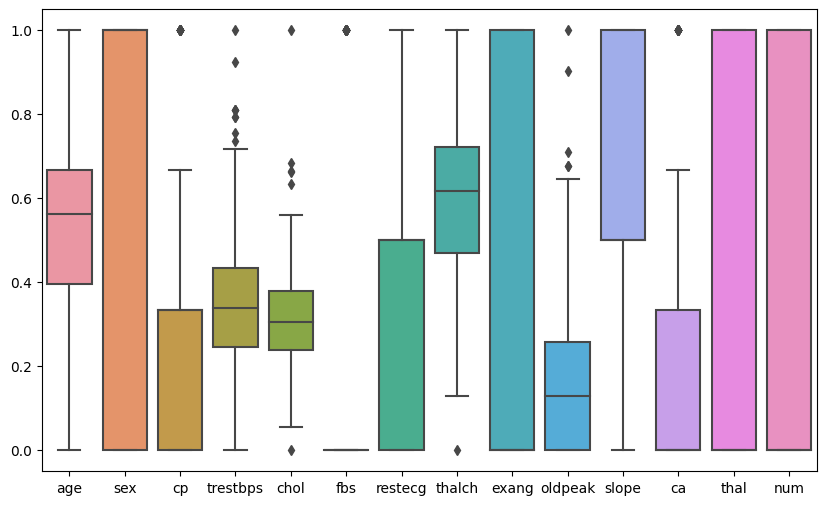

In [7]:
df = data.drop(['id', 'num_text', 'cp_text', 'sex_text', 'thal_text'], axis=1, inplace=False)
df_scaled = (df-np.min(df, axis=0))/(np.max(df, axis=0)-np.min(df, axis=0)).values
plt.figure(figsize=(10,6))
sns.boxplot(data=df_scaled)

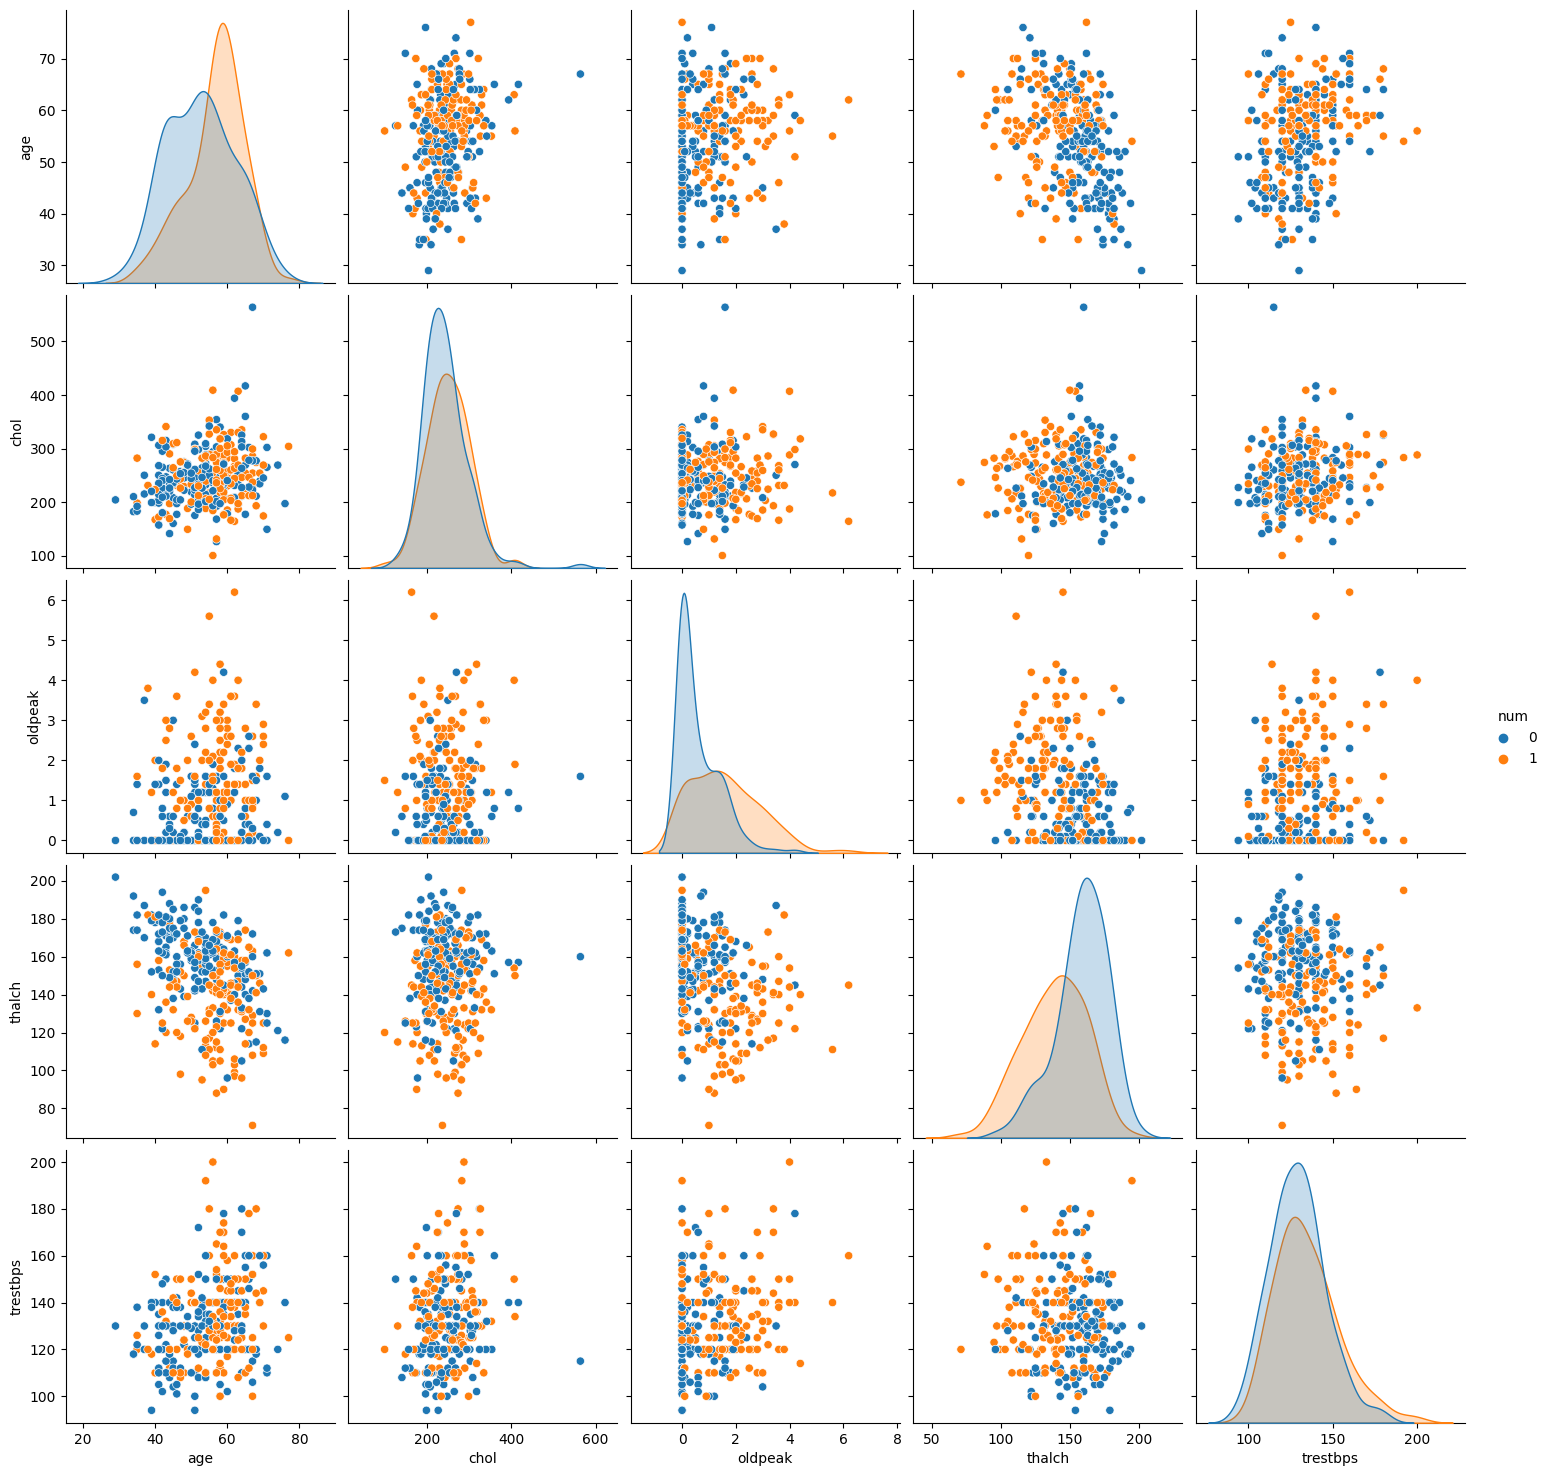

In [8]:
# Visualizing continuous variables
df = data[['age', 'chol', 'oldpeak', 'thalch', 'trestbps', 'num']]
sns.pairplot(data=df, hue='num', height=3)

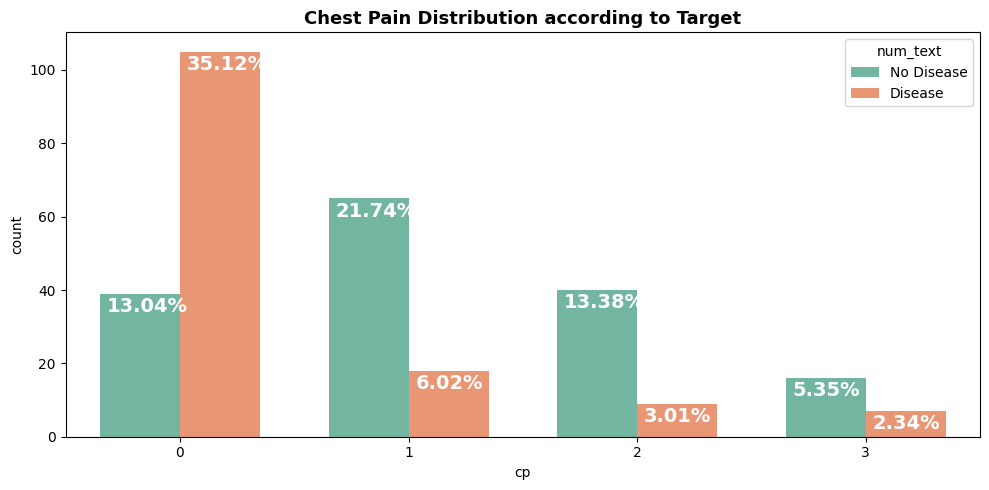

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
name = data['cp']
ax = sns.countplot(x='cp', hue='num_text', data=data, palette='Set2', width=0.7)
ax.set_title("Chest Pain Distribution according to Target", fontsize = 13, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

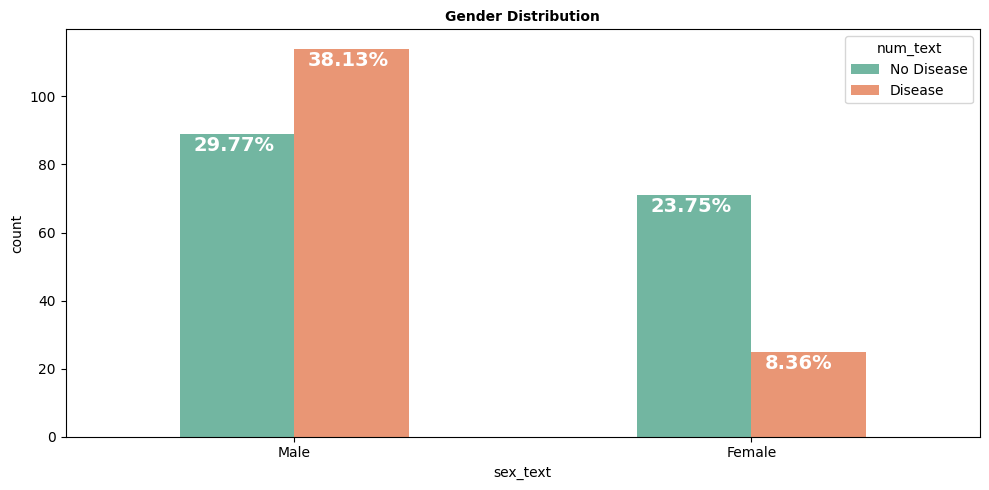

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='sex_text', hue='num_text', data=data, palette='Set2', width=0.5)
ax.set_title("Gender Distribution", fontsize = 10, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

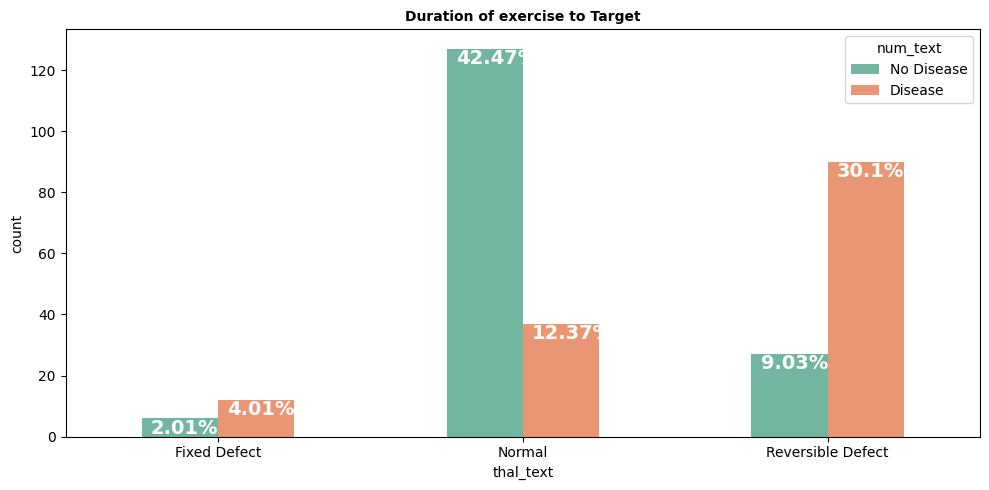

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='thal_text', hue='num_text', data=data, palette='Set2', width=0.5)
ax.set_title("Duration of exercise to Target", fontsize = 10, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

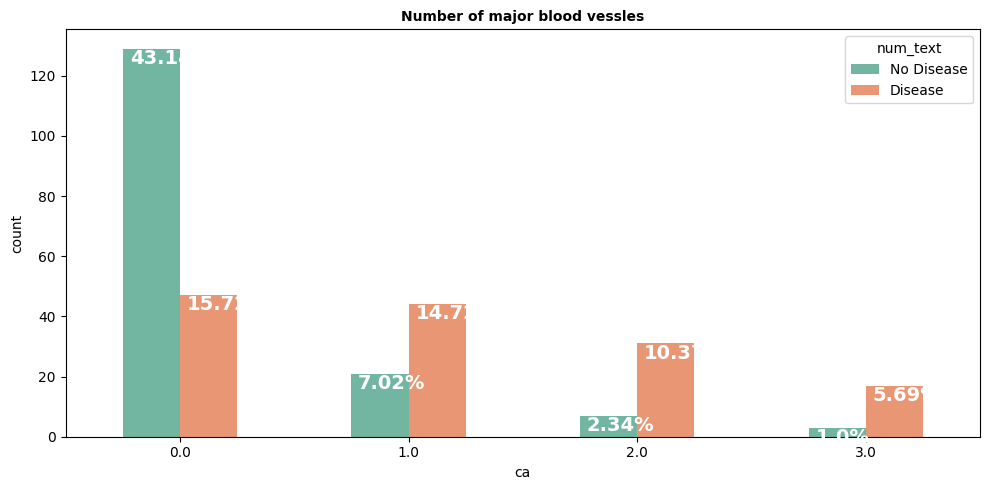

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='ca', hue='num_text', data=data, palette='Set2', width=0.5)
ax.set_title("Number of major blood vessles", fontsize = 10, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

/var/folders/p9/xt4cp34n3fxdkk5sts27rrzw0000gp/T/ipykernel_8520/2146787241.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap="RdYlGn")


<AxesSubplot: >

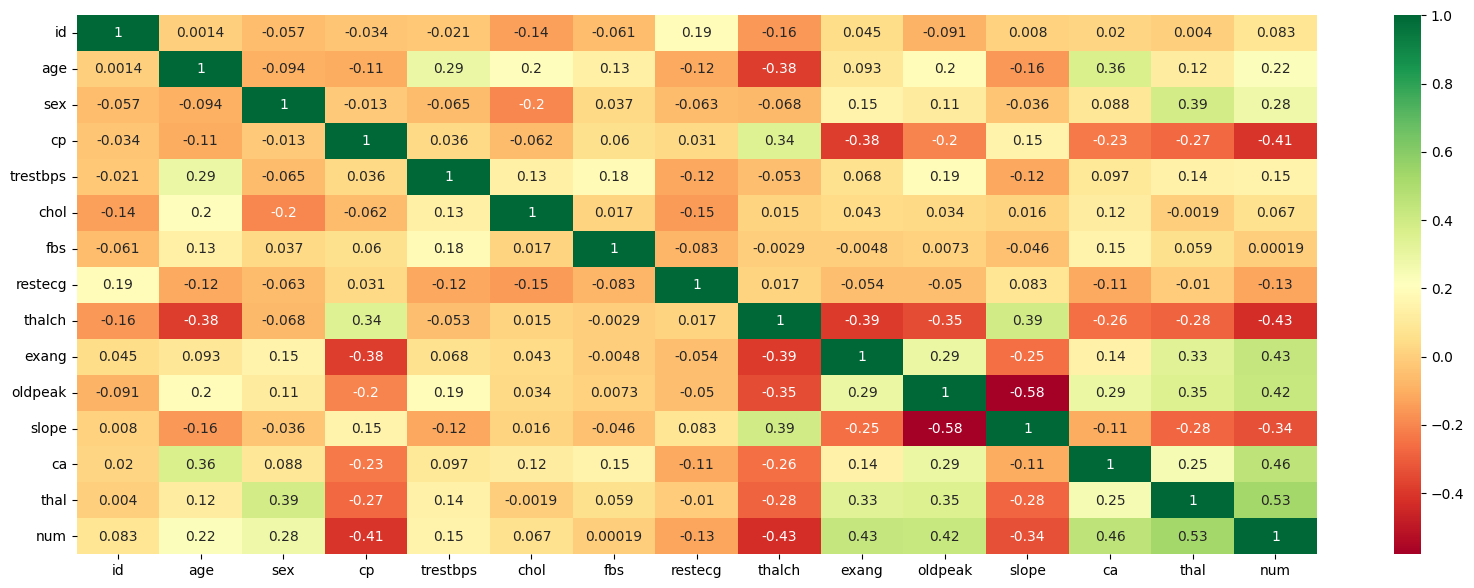

In [15]:
# Correlation between variables
plt.figure(figsize=(20,7)) 
sns.heatmap(data.corr(), annot = True, cmap="RdYlGn")

In [ ]:
#checking the distribution of independent variables
# from statsmodels.graphics.gofplots import qqplot
# data_norm=data[['oldpeak']]
# for c in data_norm.columns[:]:
#   plt.figure(figsize=(8,5))
#   fig=qqplot(data_norm[c],line='45',fit='True')
#   plt.xticks(fontsize=13)
#   plt.yticks(fontsize=13)
#   plt.xlabel("Theoretical quantiles",fontsize=15)
#   plt.ylabel("Sample quantiles",fontsize=15)
#   plt.title("Q-Q plot of {}".format(c),fontsize=16)
#   plt.grid(True)
#   plt.show()

In [ ]:
df = data['sex'].value_counts().reset_index().rename(columns={'index':'sex','sex':'count'})
fig = go.Figure([go.Pie(labels=['Male', 'Female'],values=df['count'], hole = 0.5)])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')
fig.update_layout(title="Male to Female ratio in the study",title_x=0.5)
fig.show()

In [ ]:
df=data['cp'].value_counts().reset_index().rename(columns={'index':'cp','cp':'count'})
fig = go.Figure([go.Pie(labels=df['cp'],values=df['count'], hole = 0.5)])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')
fig.update_layout(title="Chest Pain Conditions",title_x=0.5)
fig.show()

In [ ]:
df = data.drop(['id', 'num_text', 'sex_text', 'cp_text'], axis=1)
df.to_csv('heart_imputed.csv', index=False)

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(df['num'], df[['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'cp', 'exang']]).fit()

# Print out the statistics
model.summary()